In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [3]:
#Part 1
GDP_percapita = dfLE['GDP']/dfLE['Population']
dfLE['GDPpercapita'] = GDP_percapita
df_new = dfLE.dropna().iloc[:, [0,15]]
df_new.sample(10)


,Country,GDPpercapita
139,RussianFederation,6051.277837
174,Tunisia,2942.049453
26,Burundi,117.466394
164,Sweden,32350.966244
160,SriLanka,828.792356
27,CaboVerde,2271.693565
58,Fiji,2915.548676
101,Malaysia,4117.493318
162,Suriname,5685.676418
32,Chad,647.087031


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

##### Function to make plotting graphs easier

In [4]:
#Print all distributions
def bigGraph(df_in, columnName):
    data = pd.Series(df_in[columnName])
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) #See more below

    thinkplot.PrePlot(2, rows =1, cols=2)
    thinkplot.SubPlot(1, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(2, title="PDF")
    thinkplot.Pdf(pdf)


    thinkplot.Config()
    return


 ##### isDeveloped regular density and cumulative

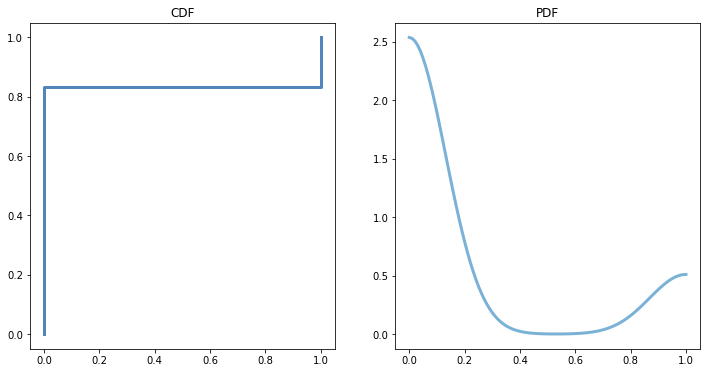

In [5]:
bigGraph(dfLE, "isDeveloped")

 ##### Lifeexpectancy regular density and cumulative

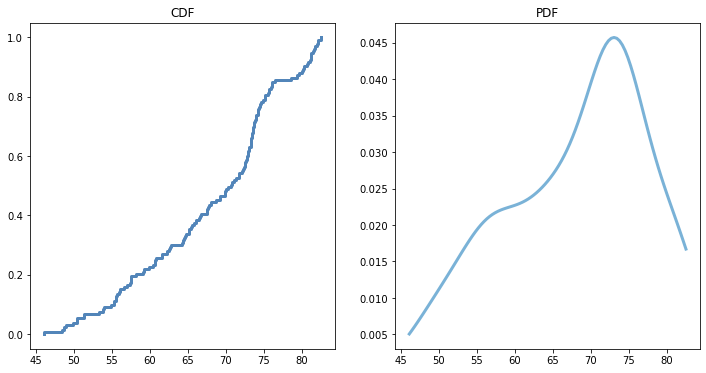

In [6]:
bigGraph(dfLE.dropna(), "Lifeexpectancy")

 ##### AdultMortality regular density and cumulative

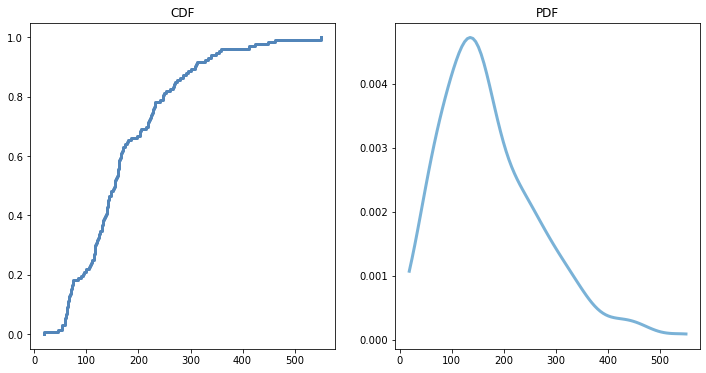

In [7]:
bigGraph(dfLE.dropna(), "AdultMortality")

 ##### infantdeaths regular density and cumulative

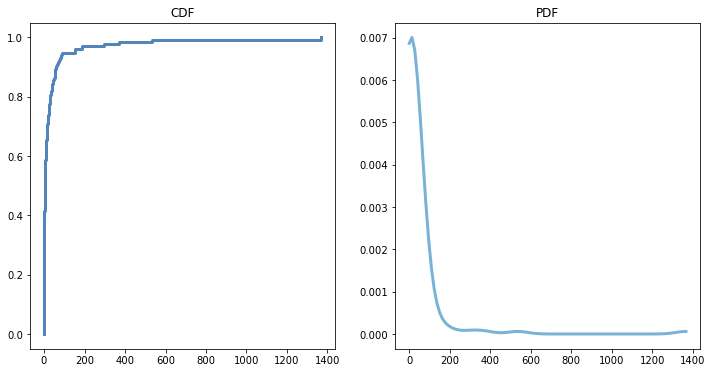

In [8]:
bigGraph(dfLE.dropna(), "infantdeaths")

 ##### Alcohol regular density and cumulative

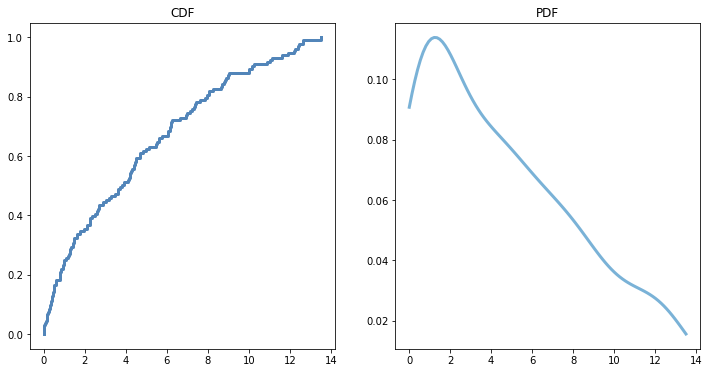

In [9]:
bigGraph(dfLE.dropna(), "Alcohol")

 ##### HepatitisB regular density and cumulative

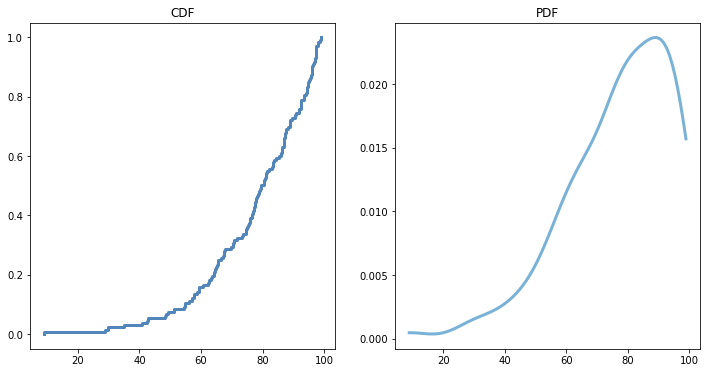

In [10]:
bigGraph(dfLE.dropna(), "HepatitisB")

 ##### Measles regular density and cumulative

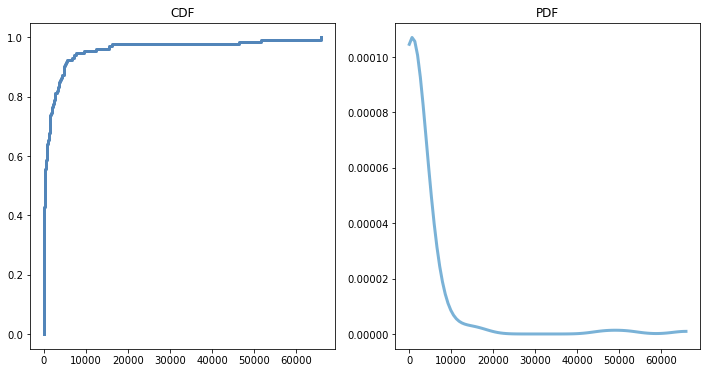

In [11]:
bigGraph(dfLE.dropna(), "Measles")

 ##### BMI regular density and cumulative

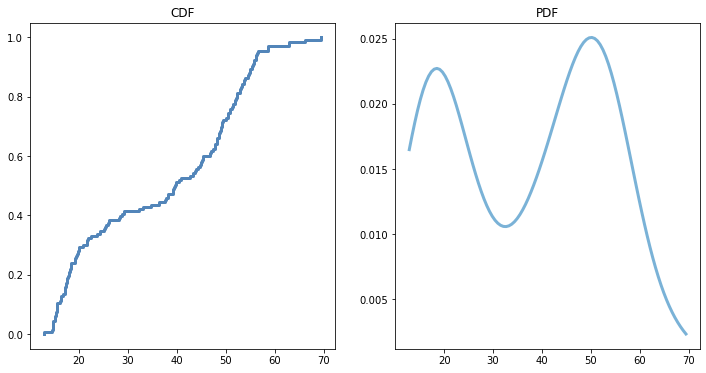

In [12]:
bigGraph(dfLE.dropna(), "BMI")

 ##### under-fivedeaths regular density and cumulative

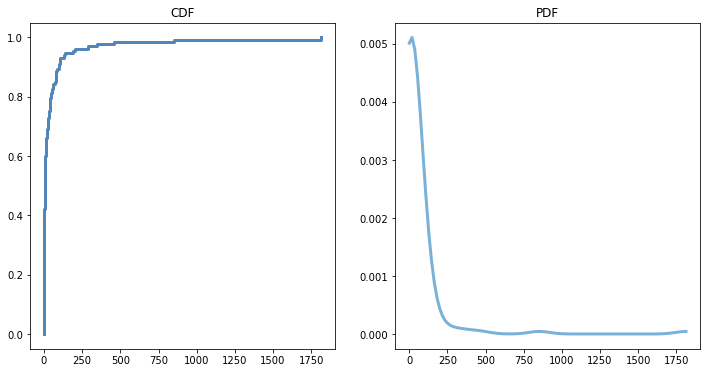

In [13]:
bigGraph(dfLE.dropna(), "under-fivedeaths")

 ##### Polio regular density and cumulative

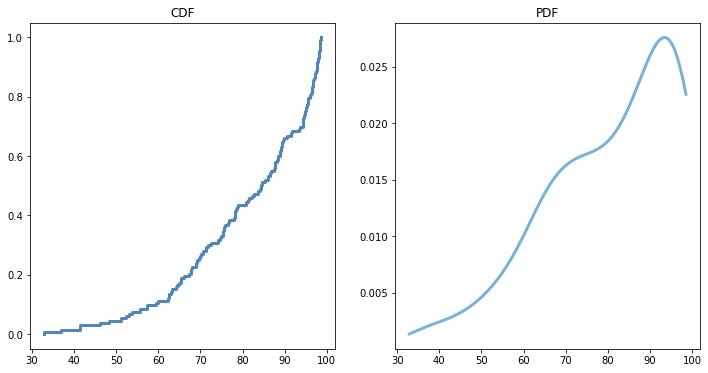

In [14]:
bigGraph(dfLE.dropna(), "Polio")

 ##### Diphtheria regular density and cumulative

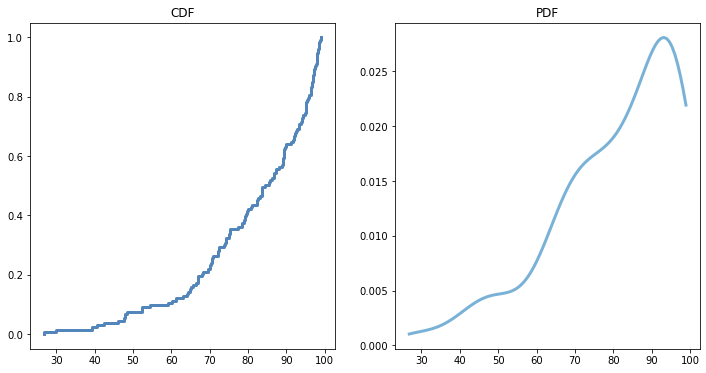

In [15]:
bigGraph(dfLE.dropna(), "Diphtheria")

 ##### GDP regular density and cumulative

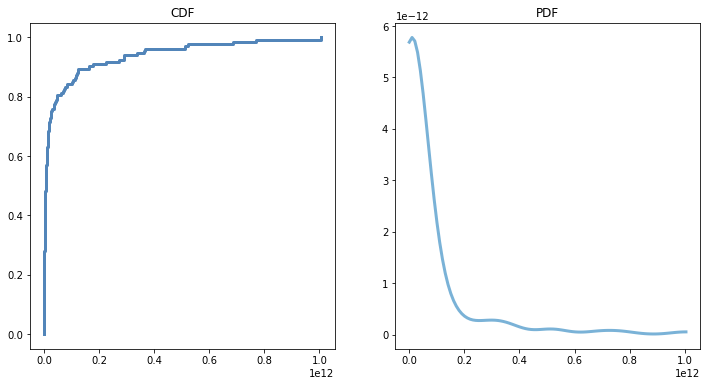

In [16]:
bigGraph(dfLE.dropna(), "GDP")

 ##### Population regular density and cumulative

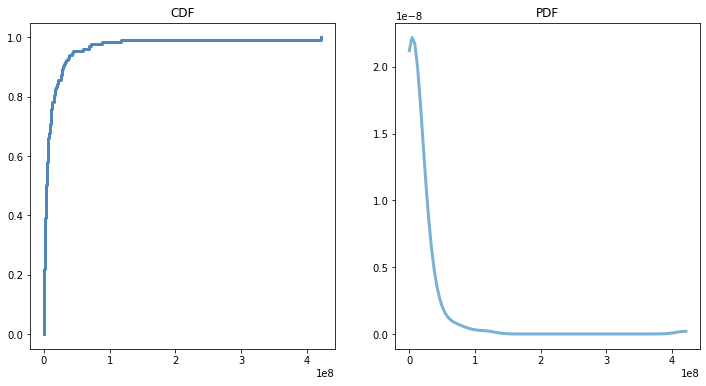

In [17]:
bigGraph(dfLE.dropna(), "Population")

 ##### Schooling regular density and cumulative

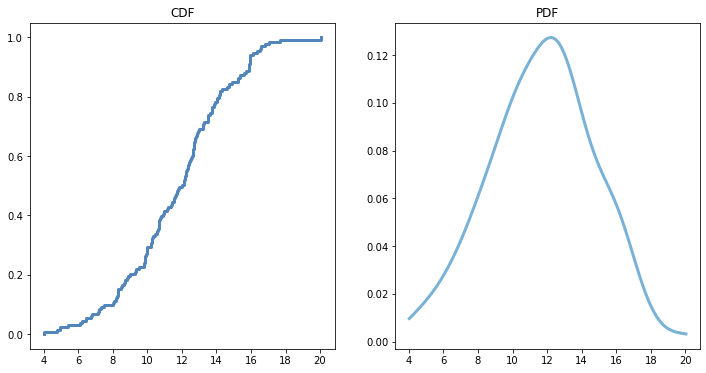

In [18]:
bigGraph(dfLE.dropna(), "Schooling")

 ##### GDPpercapita regular density and cumulative

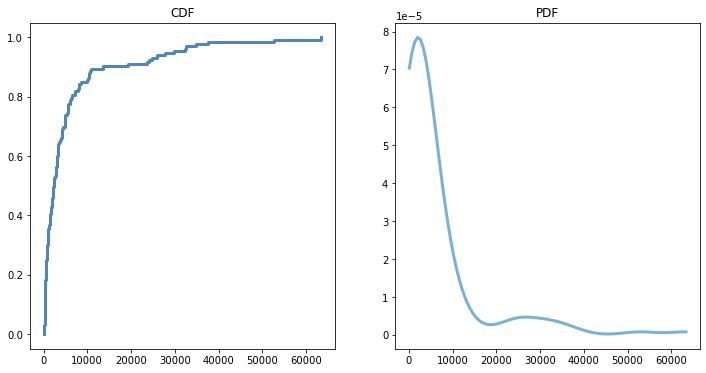

In [19]:
bigGraph(dfLE.dropna(), "GDPpercapita")

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

##### Analytical distribution using histogram

<AxesSubplot:xlabel='Schooling', ylabel='Count'>

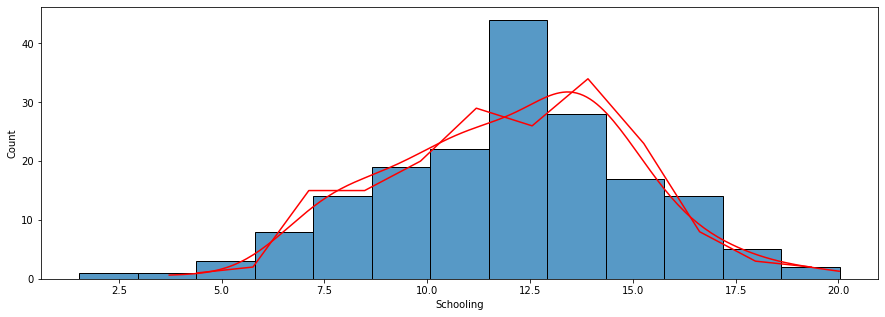

In [20]:
#Analytical for Schooling
Analyzeschool = np.random.normal(dfLE['Schooling'].mean(),dfLE['Schooling'].std(),dfLE['Schooling'].count())
sns.histplot(data=Analyzeschool, fill=False, element='poly', color='red', kde=True)
sns.histplot(data=dfLE['Schooling'])

In [21]:
d1 = dfLE[dfLE['Country'] == 'Canada']
d1

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPpercapita
30,Canada,0.0,81.6875,64.625,2.0,8.053333,28.846154,129.5,55.8625,2.0,85.3125,91.0625,3.384881e+11,1.136405e+07,15.875,29785.859548


##### Also 1 thing to note is that Canada is not developed. This leads me to believe some of the data is not an accurate representation of the real world.

#### Percentage that have schooling within 1 year(Canada)

In [22]:
SchoolCDF = thinkstats2.Cdf(Analyzeschool)
dfLE['Country'] == 'Canada'
print(100-SchoolCDF.PercentileRank(15.875+1))
print(100-SchoolCDF.PercentileRank(15.875-1))

4.49438202247191
14.044943820224717


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

##### Analytical distribution using Histogram

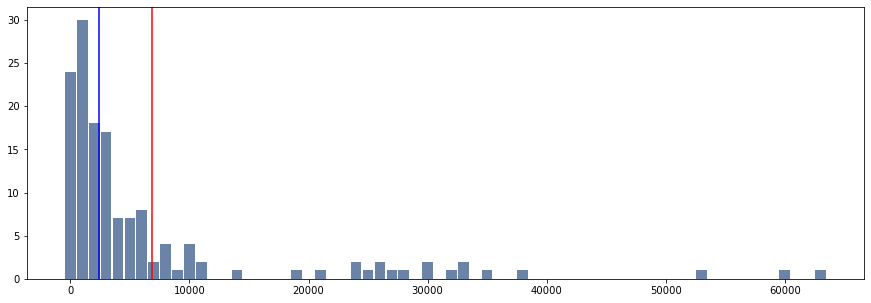

In [23]:
#Analytical for GDP/capita
capitaHist = thinkstats2.Hist(round(dfLE['GDPpercapita'],-3))
thinkplot.Hist(capitaHist)
plt.axvline(dfLE['GDPpercapita'].mean(),color='red')
plt.axvline(dfLE['GDPpercapita'].median(),color='blue')


##### We can see by the graph that the distribution is very log normal. The data is heavily right skewed and as a result would not be suitable as it is right now to include in further investigations. Howevever, if we were to remove the outliers that is heavily effecting the statistics of this demographic we could then say that it is more reliable.

In [24]:
GDPpercapita = dfLE['GDPpercapita']
log_GDP = np.log10(GDPpercapita)
cdf_log = thinkstats2.Cdf(log_GDP)

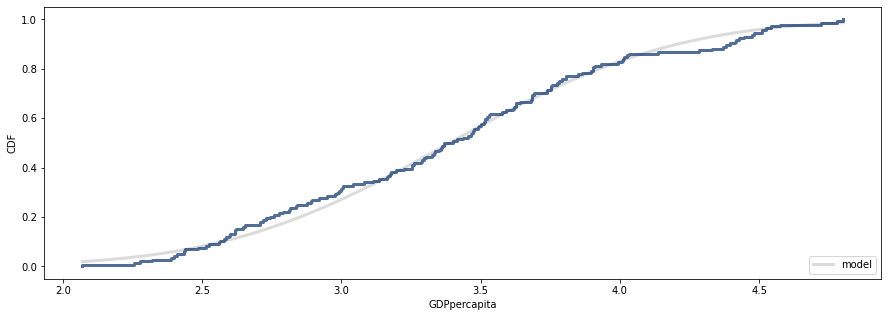

In [25]:
mu, sigma = log_GDP.mean(), log_GDP.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=min(log_GDP), high=max(log_GDP))
thinkplot.Plot(xs, ps, label='model', color='0.8')
thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='GDPpercapita', ylabel='CDF', loc='lower right')

##### For this graph i have compared the distribution to lognormal. This means that based on our empirical data and how closely the line matches, we can make accurate predictions. The only place we may not be able to make an accurate prediction is at the tail end of the cdf because the high values there. All in all though i think that we can still keep GDPpercapita because it still closely matches for the most part.

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

##### Grab some basic statistics on columns that look to have outiliers in the scatter plots below. I compared them and decided to filter out outliers that contained values that was way above or way below where most of the data was sitting.

##### Measles

In [26]:
dfLE['Measles'].describe()

count      191.000000
mean      2326.165576
std       7924.050116
min          0.000000
25%          4.781250
50%        138.937500
75%       1501.593750
max      65857.937500
Name: Measles, dtype: float64

##### under-fivedeaths

In [27]:
dfLE['under-fivedeaths'].describe()

count     191.000000
mean       40.412631
std       154.310693
min         0.000000
25%         0.000000
50%         3.250000
75%        25.281250
max      1812.500000
Name: under-fivedeaths, dtype: float64

##### Population

In [28]:
dfLE['Population'].describe()

count    1.440000e+02
mean     1.265734e+07
std      3.827961e+07
min      2.920000e+02
25%      9.623203e+05
50%      3.665163e+06
75%      1.034789e+07
max      4.214677e+08
Name: Population, dtype: float64

##### GDPpercapita

In [29]:
dfLE['GDPpercapita'].describe()

count      144.000000
mean      6886.716335
std      11457.048602
min        117.466394
25%        735.594643
50%       2424.224604
75%       6083.726099
max      63337.610450
Name: GDPpercapita, dtype: float64

##### GDP

In [30]:
dfLE['GDP'].describe()

count    1.910000e+02
mean     4.550119e+10
std      1.305612e+11
min      0.000000e+00
25%      4.776139e+06
50%      2.662176e+09
75%      1.508067e+10
max      1.004677e+12
Name: GDP, dtype: float64

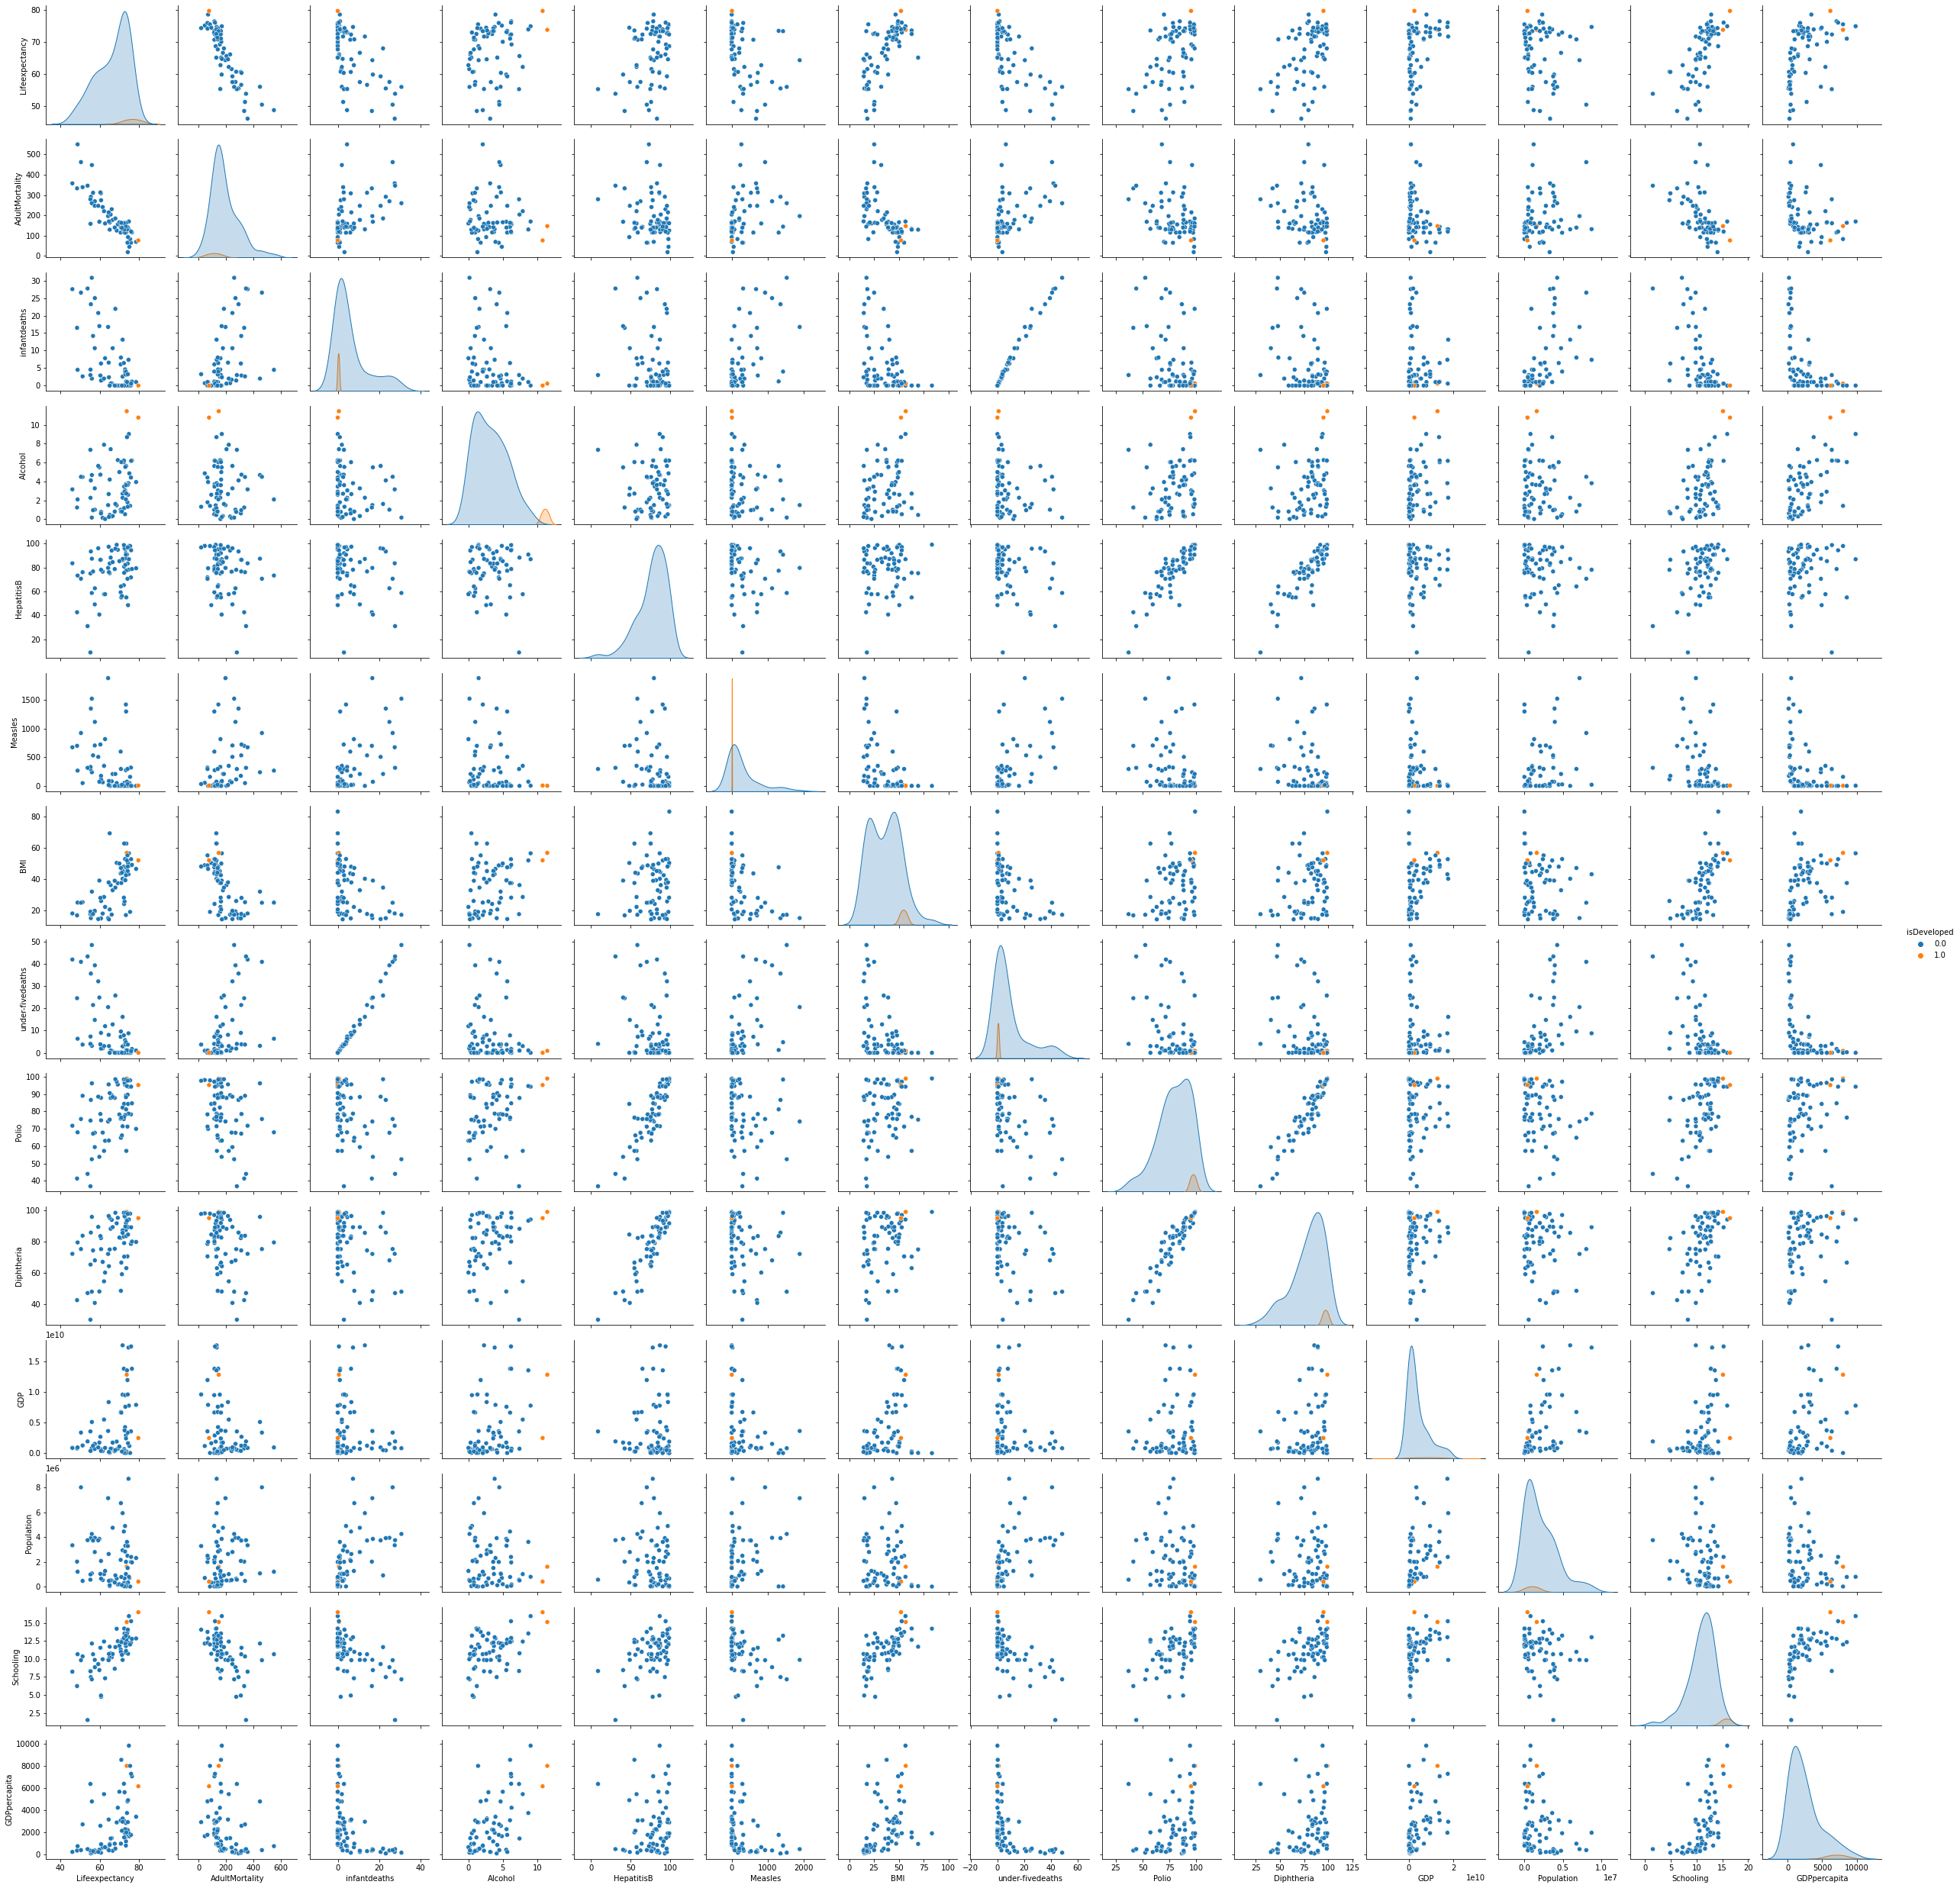

In [31]:
filtered = dfLE[dfLE['infantdeaths'] < 50]
filtered = filtered[filtered['Measles'] < 2000]
filtered = filtered[filtered['under-fivedeaths'] < 100]
filtered = filtered[filtered['GDP'] < 20000000000]
filtered = filtered[filtered['Population'] < 15000000 ]
filtered = filtered[filtered['GDPpercapita'] < 10000]

sns.pairplot(filtered, dropna=True, kind="scatter", hue='isDeveloped')
plt.show()

##### For the correlations found in this scatter plot I have decided to filter measles, under-fivedeaths, and infant deaths, population, GDP and GDP percapita. This was because if we look at the simple statistics regarding the data we can see that there are values that heavily skews the mean from the rest of the data. This leads me to suggest that the values that are effecting this are unreasonable and needs to be dropped. We would want to focus on the values that are within a reaonable range and not the ones that are way above the data and make no sense.

##### I also want to focus on a few other outliers from individual scatter plots to compare the data to see if the change makes a difference in the correlation. If there is no change or makes it more correlated, then im going to keep that outlier out to show a more accurate representation. If it makes my data all weird and make no sense after, then im going to assume that value was nessasary to the data and ill keep it in. 

<AxesSubplot:xlabel='AdultMortality', ylabel='Lifeexpectancy'>

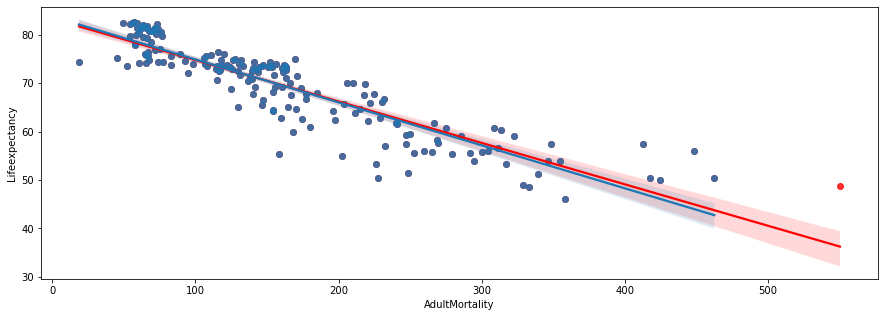

In [32]:
dffilteredAdult = dfLE[dfLE['AdultMortality'] < 500]
sns.regplot(x=dfLE['AdultMortality'], y=dfLE['Lifeexpectancy'], color='red')
sns.regplot(x=dffilteredAdult['AdultMortality'], y=dffilteredAdult['Lifeexpectancy'])

<AxesSubplot:xlabel='HepatitisB', ylabel='Polio'>

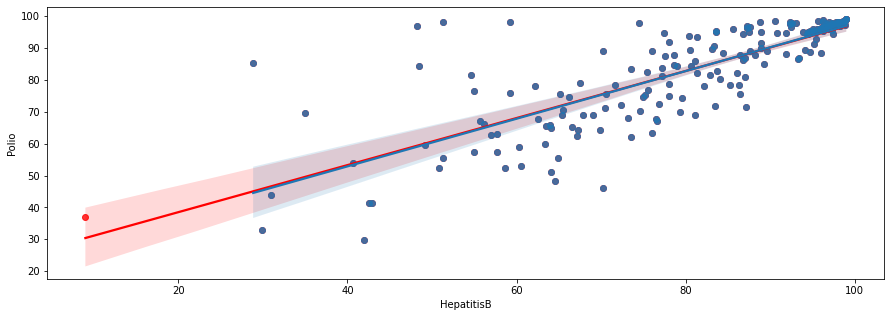

In [33]:
dffilteredAdult = dfLE[dfLE['HepatitisB'] > 20]
sns.regplot(x=dfLE['HepatitisB'], y=dfLE['Polio'], color='red')
sns.regplot(x=dffilteredAdult['HepatitisB'], y=dffilteredAdult['Polio'])

<AxesSubplot:xlabel='HepatitisB', ylabel='Diphtheria'>

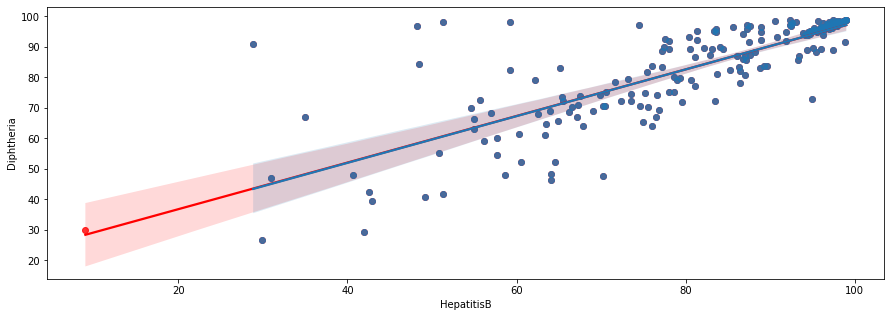

In [34]:
dffilteredAdult = dfLE[dfLE['HepatitisB'] > 20]
sns.regplot(x=dfLE['HepatitisB'], y=dfLE['Diphtheria'], color='red')
sns.regplot(x=dffilteredAdult['HepatitisB'], y=dffilteredAdult['Diphtheria'])

<AxesSubplot:xlabel='BMI', ylabel='Schooling'>

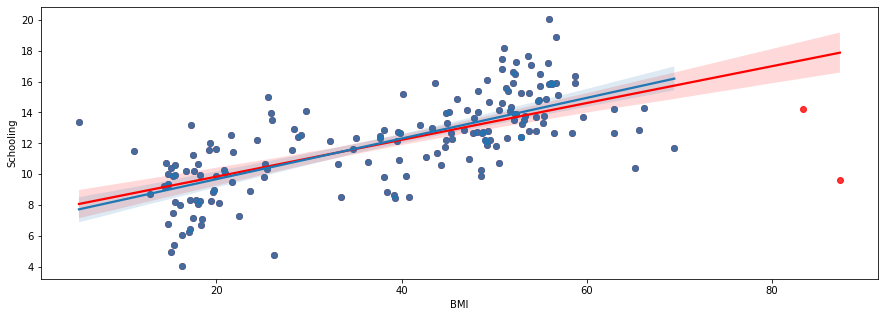

In [35]:
dffilteredAdult = dfLE[dfLE['BMI'] < 70]
sns.regplot(x=dfLE['BMI'], y=dfLE['Schooling'], color='red')
sns.regplot(x=dffilteredAdult['BMI'], y=dffilteredAdult['Schooling'])

<AxesSubplot:xlabel='Schooling', ylabel='Lifeexpectancy'>

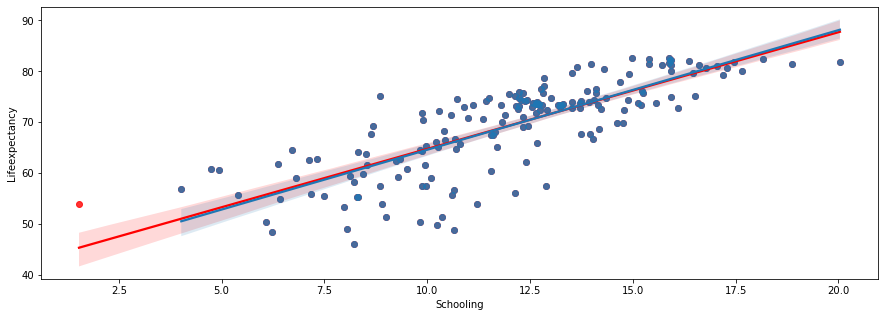

In [36]:
dffilteredAdult = dfLE[dfLE['Schooling'] > 2.5]
sns.regplot(x=dfLE['Schooling'], y=dfLE['Lifeexpectancy'], color='red')
sns.regplot(x=dffilteredAdult['Schooling'], y=dffilteredAdult['Lifeexpectancy'])

##### For these specific comparisions you can tell that the outliers dont really change the data all that much but it also doesnt take our result out of porportion. It may be a small difference in the outcome but I would argue that these changes are still relevant because it does make the result at least a little bit more accurate.

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

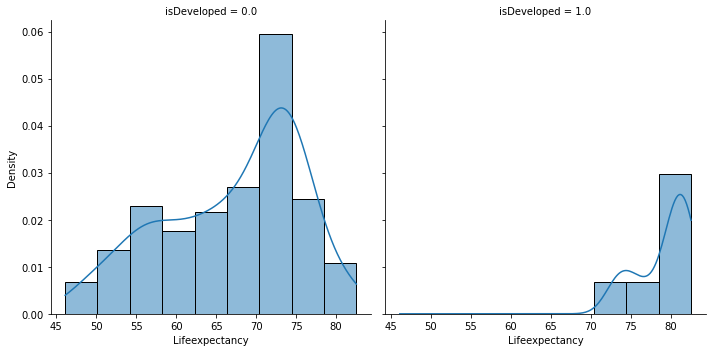

In [37]:
#Calculate correlations and analyze. 
sns.displot(data=dfLE, x="Lifeexpectancy", kde=True, col="isDeveloped", stat="density")

##### Using just a general comparison to lifeexpectancy and whether or not you are a developed country we can see there is a clear difference between the two. This proves that whether or not you are developed, you will have a different life expectancy

##### Correlation tables to easily identify strongest correlations

In [38]:
Developed = dfLE[dfLE["isDeveloped"] == 1]


Developed = Developed.apply(pd.to_numeric, errors='coerce')
Developed = Developed.drop(columns=["Country", 'isDeveloped'])
Developed.corr()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPpercapita
Lifeexpectancy,1.000000,-0.883067,-0.054296,-0.345349,-0.462585,0.155579,-0.164733,-0.049539,-0.102560,-0.292043,0.372168,0.185499,0.417589,0.628680
AdultMortality,-0.883067,1.000000,-0.098591,0.197672,0.330510,-0.064511,0.098291,-0.100842,0.190065,0.196768,-0.249389,-0.091428,-0.321625,-0.535071
infantdeaths,-0.054296,-0.098591,1.000000,-0.103579,-0.066736,0.087652,0.130209,0.999401,-0.432263,0.079609,-0.017112,0.635370,-0.069356,-0.136147
Alcohol,-0.345349,0.197672,-0.103579,1.000000,0.182868,-0.195681,0.366211,-0.102564,-0.034656,0.034735,0.060959,0.018983,0.037187,-0.060292
HepatitisB,-0.462585,0.330510,-0.066736,0.182868,1.000000,0.101597,-0.217556,-0.068102,0.065349,0.235503,-0.204299,-0.019519,-0.387205,-0.247542
Measles,0.155579,-0.064511,0.087652,-0.195681,0.101597,1.000000,-0.514210,0.103718,0.126213,0.078398,0.154427,0.148606,-0.151025,-0.007123
BMI,-0.164733,0.098291,0.130209,0.366211,-0.217556,-0.514210,1.000000,0.116756,-0.215469,-0.190945,0.163567,0.218074,0.228820,-0.077209
under-fivedeaths,-0.049539,-0.100842,0.999401,-0.102564,-0.068102,0.103718,0.116756,1.000000,-0.426046,0.083590,-0.015768,0.596569,-0.048762,-0.139448
Polio,-0.102560,0.190065,-0.432263,-0.034656,0.065349,0.126213,-0.215469,-0.426046,1.000000,0.658724,0.056518,0.156818,-0.537161,-0.284668
Diphtheria,-0.292043,0.196768,0.079609,0.034735,0.235503,0.078398,-0.190945,0.083590,0.658724,1.000000,-0.076409,-0.019693,-0.618087,-0.343766


In [39]:
NotDeveloped = dfLE[dfLE["isDeveloped"] != 1]


NotDeveloped = NotDeveloped.apply(pd.to_numeric, errors='coerce')
NotDeveloped = NotDeveloped.drop(columns=["Country", 'isDeveloped'])
NotDeveloped.corr()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPpercapita
Lifeexpectancy,1.000000,-0.875761,-0.167719,0.253968,0.439587,-0.174120,0.694751,-0.196396,0.646052,0.650166,0.207723,-0.005223,0.735940,0.534363
AdultMortality,-0.875761,1.000000,0.058721,-0.054716,-0.307244,0.060744,-0.573202,0.079719,-0.472740,-0.456331,-0.135346,-0.044389,-0.519505,-0.372339
infantdeaths,-0.167719,0.058721,1.000000,-0.056868,-0.303191,0.710246,-0.258821,0.996936,-0.223292,-0.224616,0.256030,0.911505,-0.178552,-0.115501
Alcohol,0.253968,-0.054716,-0.056868,1.000000,0.027961,-0.009981,0.156215,-0.050346,0.197650,0.181336,0.328710,-0.009957,0.444050,0.513808
HepatitisB,0.439587,-0.307244,-0.303191,0.027961,1.000000,-0.272482,0.311881,-0.318147,0.828946,0.826381,-0.146761,-0.217311,0.420240,-0.024332
Measles,-0.174120,0.060744,0.710246,-0.009981,-0.272482,1.000000,-0.278659,0.718816,-0.226517,-0.247361,0.140676,0.524325,-0.146954,-0.105946
BMI,0.694751,-0.573202,-0.258821,0.156215,0.311881,-0.278659,1.000000,-0.271438,0.455828,0.446204,0.111173,-0.142671,0.639425,0.428275
under-fivedeaths,-0.196396,0.079719,0.996936,-0.050346,-0.318147,0.718816,-0.271438,1.000000,-0.249489,-0.251942,0.246356,0.896386,-0.196864,-0.121990
Polio,0.646052,-0.472740,-0.223292,0.197650,0.828946,-0.226517,0.455828,-0.249489,1.000000,0.947728,0.096040,-0.086589,0.611088,0.322182
Diphtheria,0.650166,-0.456331,-0.224616,0.181336,0.826381,-0.247361,0.446204,-0.251942,0.947728,1.000000,0.119152,-0.076424,0.601438,0.322291


##### Not developed heatmap for an even easier look at the data 

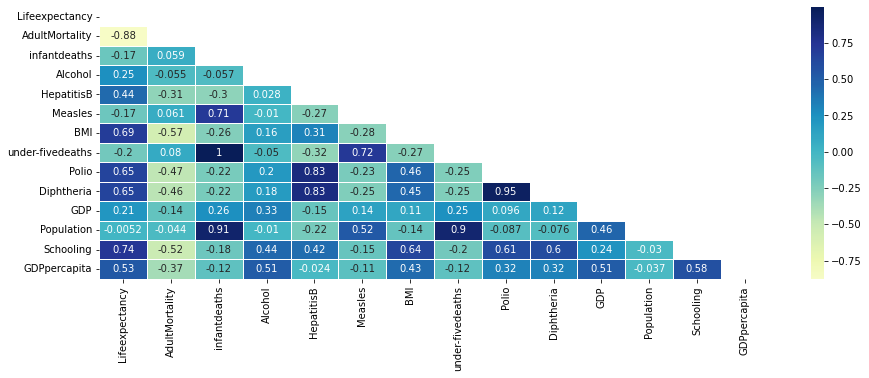

In [40]:
mask = np.triu(np.ones_like(NotDeveloped.corr(), dtype=bool))
sns.heatmap(NotDeveloped.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

##### 3 strongest correlations for Not Developed
##### -Adult Mortality(-0.88)
##### -Schooling (0.74)
##### -BMI (0.69)

##### If we look at Adult mortality it makes complete sense for it to be negatively correlated in respect to both developed and not developed. This is because adult mortality measures your chances of dying while lifeexpectancy measures how long your are expected to live. If you have a lower chance of dying then it makes sense that you would have a longer chance to live. For Schooling I would argue that it being positively correlated also makes sense. Maybe there are some countries that are not developed and are starting to become developed and have a bit more schools compared to other not developed countries. We already know that if you are developed you are more likeley to have a higher life expectancy so if a country is becoming slightly more developed with schools then we can say that it makes sense for schooling to have a positive correlation on not developed countries. Lastly, for BMI we can see that it has a positive correlation and i would say that also seems real as a lot of under developed countries dont have the same access to food like developed countries do. If you dont have that access you are less likely to have a high life expectancy due to starvation and other factors. So it makes sense that the heavier you are in a not developed country then you are probably in a more lucky situation and have a longer life expectancy.

##### Developed for an even easier view of the data 

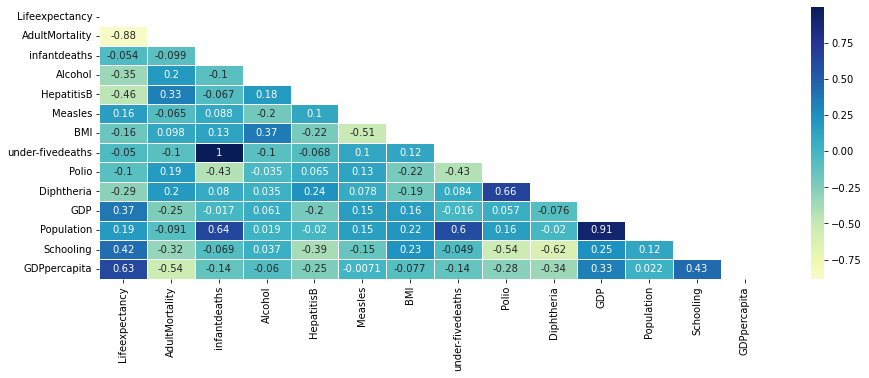

In [41]:
mask = np.triu(np.ones_like(Developed.corr(), dtype=bool))
sns.heatmap(Developed.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

##### 3 strongest correlations for developed countries
##### -Adult Mortality(-0.88)
##### -GDPpercapita(0.63)
##### -HepatitisB(-0.46)

##### Adult mortality would still be the same reasoning for developed countries as compared to not developed(see above written answer). With GDP per capita it would make sense to have a positive correlation as more developed countries have access to healthcare and other luxuries to help expand our life expectancy. So if you have a higher income then you can probably afford better healthcare and thus increase your life expectancy for a given country. For Hepatitis B this one is a little less correlated than the others but i would argue that the reasoning for this would be that for a developed country , how many people in your country with hepatitis B is going to effect your life expectancy but it is less correlated due to the fact of healthcare in most developed countries. It would make sense that if you are a country with less hepatitisB then you would have a greater life expectancy. And since there is not as much Hepatitis B it doesnt play as big of a factor.

##### _________________________________________________________________________________________________

##### 2 places with a substantial difference in correlation with respect to lifeexpectancy

##### If we look at any of the places like measles, HepatitisB, diphtheria or polio we can tell that all of them have a strong correlation to life expectancy mostly due in my opinion the lack of healthcare in those undeveloped countries.  Where as if you're developed, you could get these deseases it is more tolerable due to better healthcare and thus will not have an impact on correlation for lifeexpectancy.

##### We could also look at Alcohol, although they are not as strongly correlated we can still see that they have the opposite relationship for lifeexpectancy as we can see on the heatmap. I believe the reason why for this is that for undeveloped countries drinking alcohol leisurly is not as common for undeveloped countries. Alcohol could be considered a luxury to most places so we can see that with undeveloped countries if you are in the process of becoming developed, you probably have more access to alcohol and more luxuries in your life and thus can be an indicator of a greater life expectancy. Where as if we look at developed countries we can see that people can abuse the use of alcohol because its easier to obtain and can have a negative impact on overall health which would in turn decrease overall life expectancy. For undeveloped countries, it makes sense that you would have a positive correlation and for developed countries, you would have a negative because of this.